In [ ]:
The  data  is  available  as  two  attached  CSV  files: 
takehome_user_engagement. csv 
takehome_users . csv 
The  data  has  the  following  two  tables: 
1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the product  in  the  last  two  years.   This  table  includes: 
● name:  the  user's  name 
● object_id:   the  user's  id 
● email:  email  address 
● creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values: 
○ PERSONAL_PROJECTS:  invited  to  join  another  user's 
personal  workspace 
○ GUEST_INVITE:  invited  to  an  organization  as  a  guest 
(limited  permissions) 
○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member) 
○ SIGNUP:  signed  up  via  the  website 
○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google 
Authentication  (using  a  Google  email  account  for  their  login 
id) 
● creation_time:  when  they  created  their  account 
● last_session_creation_time:   unix  timestamp  of  last  login 
● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails 
● enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip 
● org_id:   the  organization  (group  of  users)  they  belong  to 
● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable). 
2]  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product.
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption . 
We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less. Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data you  think  would  be  valuable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [27]:
with open('/content/takehome_users.csv') as f:
    print(f)
with open('/content/takehome_user_engagement.csv') as f:
    print(f)

<_io.TextIOWrapper name='/content/takehome_users.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/takehome_user_engagement.csv' mode='r' encoding='UTF-8'>


In [30]:
users=pd.read_csv('/content/takehome_users.csv', parse_dates = ['creation_time'], encoding = "cp1252")

In [31]:
users_eng = pd.read_csv('/content/takehome_user_engagement.csv',  parse_dates = ['time_stamp'], encoding = "cp1252")

In [32]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [33]:
users.rename(columns={'object_id':'user_id'}, inplace=True)

In [34]:
users_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [35]:
users_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [36]:
users_eng.time_stamp = pd.to_datetime(users_eng.time_stamp)

In [37]:
users_eng1 = users_eng.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()

In [38]:
users_eng1=pd.DataFrame(users_eng1)
users_eng1.head()

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0

In [39]:
users_eng1 = users_eng1.rolling(window=7, min_periods=1).sum()

In [40]:
users_eng1.reset_index(inplace=True)

In [41]:
users_eng1.head()

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0


In [42]:
users_eng2 = users_eng1.groupby('user_id')[['visited']].max()

In [43]:
users_eng2.head()

,visited
user_id,
1,1.0
2,3.0
3,2.0
4,3.0
5,4.0


In [44]:
users_eng2.loc[users_eng2['visited'] >= 3, 'adopted_user'] = 1
users_eng2.loc[users_eng2['visited'] < 3, 'adopted_user'] = 0

In [45]:
users_eng2['visited'] = users_eng2['visited'].astype(int)
users_eng2['adopted_user'] = users_eng2['adopted_user'].astype(int)

In [46]:
data = users_eng2.merge(users, how='inner', on='user_id', sort=True)

In [47]:
data.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,3,1,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,4,1,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


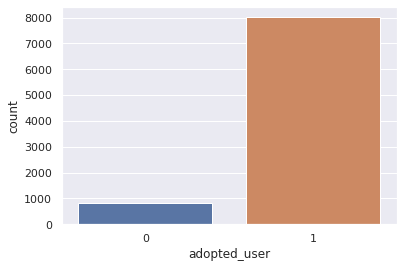

In [50]:
sns.countplot(x=data['adopted_user'])

In [59]:
data.describe()

,user_id,visited,adopted_user,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8823.000000,8823.000000,8823.000000,8.823000e+03,8823.000000,8823.000000,8823.000000,4776.000000
mean,6019.821716,5.157316,0.908421,1.379279e+09,0.252295,0.151989,142.572254,5980.495394
std,3464.251001,1.737854,0.288447,1.953116e+07,0.434354,0.359031,124.176422,3394.211361
min,1.000000,1.000000,0.000000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3017.500000,4.000000,1.000000,1.363195e+09,0.000000,0.000000,30.000000,3071.000000
50%,6034.000000,5.000000,1.000000,1.382888e+09,0.000000,0.000000,109.000000,5947.000000
75%,9029.500000,7.000000,1.000000,1.398443e+09,1.000000,0.000000,239.000000,8857.250000
max,12000.000000,7.000000,1.000000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


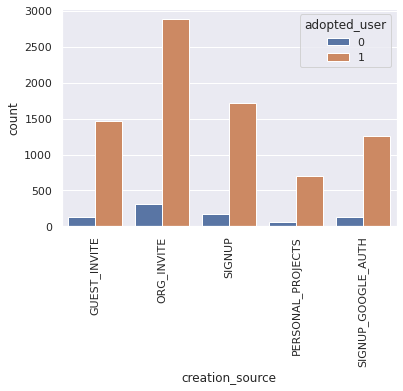

In [48]:
a = sns.countplot(x='creation_source', data=data, hue='adopted_user')
a = plt.xticks(rotation=90)


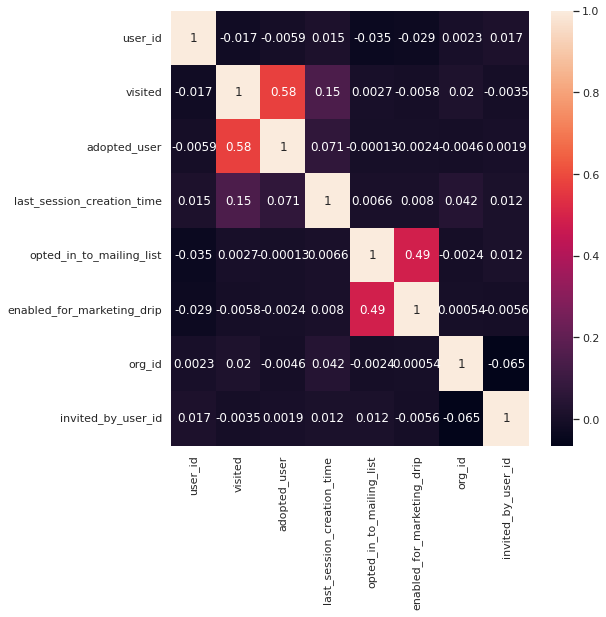

In [49]:
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [85]:
df=data

In [86]:
df.isnull().sum()

user_id                          0
visited                          0
adopted_user                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
active_days                      0
dtype: int64

In [87]:
df['invited_by_user_id'].fillna(0, inplace=True)
df['invited_by_user_id'] = df['invited_by_user_id'].astype(int)

In [88]:
df.creation_time = pd.to_datetime(df.creation_time)
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)
df['active_days'] = df['creation_time'] - df['last_session_creation_time']
df['active_days'] = df['active_days'].dt.days

In [89]:
df['active_days'].head()

0    16182
1    16024
2    15783
3    15846
4    15722
Name: active_days, dtype: int64

In [91]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,16182
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,16024
2,3,2,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,15783
3,4,3,1,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,15846
4,5,4,1,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,15722


In [92]:
last_column = df['adopted_user']
df.drop(labels=['adopted_user'], axis=1, inplace = True)
df.insert(12, 'adopted_user', last_column)
df

,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
0,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,16182,0
1,2,3,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,16024,1
2,3,2,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,15783,0
3,4,3,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,15846,1
4,5,4,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,15722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,4,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263,15954,1
8819,11997,5,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,0,15715,1
8820,11998,6,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074,16187,1
8821,11999,7,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,0,15491,1


In [93]:
df1 = df[['creation_source','opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
              'org_id', 'invited_by_user_id', 'active_days', 'adopted_user' ]]

In [94]:
creation_source_dum = pd.get_dummies(df1['creation_source'], drop_first=True)
df1.drop(['creation_source'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
df_ml = pd.concat([df1, creation_source_dum], axis=1)

In [96]:
df_ml.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,11,10803,16182,0,0,0,0,0
1,0,0,1,316,16024,1,1,0,0,0
2,0,0,94,1525,15783,0,1,0,0,0
3,0,0,1,5151,15846,1,0,0,0,0
4,0,0,193,5240,15722,1,0,0,0,0


In [97]:
last_column = df_ml['adopted_user']
df_ml.drop(labels=['adopted_user'], axis=1, inplace = True)
df_ml.insert(9, 'adopted_user', last_column)
df_ml

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted_user
0,1,0,11,10803,16182,0,0,0,0,0
1,0,0,1,316,16024,1,0,0,0,1
2,0,0,94,1525,15783,1,0,0,0,0
3,0,0,1,5151,15846,0,0,0,0,1
4,0,0,193,5240,15722,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8818,0,0,89,8263,15954,1,0,0,0,1
8819,0,0,200,0,15715,0,0,0,1,1
8820,1,1,83,8074,16187,0,0,0,0,1
8821,0,0,6,0,15491,0,1,0,0,1


In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df_ml[df_ml.columns[:9]]
y=df1.adopted_user
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
active_days,0.423911
org_id,0.336923
invited_by_user_id,0.179517
opted_in_to_mailing_list,0.017958
enabled_for_marketing_drip,0.014027
ORG_INVITE,0.011469
SIGNUP,0.006001
SIGNUP_GOOGLE_AUTH,0.005307
PERSONAL_PROJECTS,0.004886


It shows more than 90% adopted users are there.
When active days increases the adopted users rate will also increases. So, we shoulf focus in increasing active days.

While marketing campaign doesn't look that great. We need to make some new plans for better results.

While in creation_source it clearly shows that people invited  to  an  organization  (as  a  full  member)  are becoming adopted user in higher ratio. With signed  up  via  the  website and signed  up  using  Google coming after them.

